In [101]:
DATAPATH=r"C:\Users\Mohamed Arafa\Salary_Estimator\data\raw"
PROCESSEDPATH=r"C:\Users\Mohamed Arafa\Salary_Estimator\data\processed"
PLOTPATH=r"C:\Users\Mohamed Arafa\Salary_Estimator\reports\figures"
#EXPORT_PATH    = "C:/Users/Mohamed Arafa/Salary_Estimator/notebooks/processed_df.csv"

In [1]:
import pandas as pd
import numpy as np 
import pickle
import logging 
import os 

import matplotlib.pyplot as plt
import plotly.express as px
import squarify    # pip install squarify (algorithm for treemap)
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns 
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
import nltk as nltk
from nltk.tokenize import word_tokenize

In [79]:
clean_df=pd.read_csv(os.path.join(PROCESSEDPATH,"processed_df.csv"))
clean_df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,size,type,founded,industry,...,julia_req,java_req,java2_req,tensor_req,tensor2_req,seaborn_req,pandas_req,jobtitle_simp,seniority,jobdesc_length
0,Python Data Scientist,Employer Provided Salary:$70K - $120K,Synovize is a leading technology company speci...,5.0,Synovize\n5.0,Remote,1 to 50 Employees,Company - Public,-1,-1,...,0,0,0,1,1,1,1,data scientist,na,3850
1,Data Analyst - Entry Level,Employer Provided Salary:$52K - $92K,Data Analyst - Entry Level\n\nPosition Descrip...,3.9,"CGI Group, Inc.\n3.9","Dallas, TX",10000+ Employees,Company - Public,1976,Business Consulting,...,0,0,0,0,0,0,0,data analyst,jr,7140
2,Genesis Data Scientist,Employer Provided Salary:$65.00 - $75.00 Per Hour,"Develops, maintains, and collects structured a...",4.2,Infotree Global Solutions\n4.2,Remote,5001 to 10000 Employees,Company - Private,2002,HR Consulting,...,0,0,0,0,0,0,0,data scientist,na,1038
3,Data Scientist,Employer Provided Salary:$119K - $179K,Job Description\n\nIntel Foundry Services (IFS...,4.1,INTEL\n4.1,"Austin, TX",10000+ Employees,Company - Public,1968,Computer Hardware Development,...,0,0,0,1,1,0,1,data scientist,na,4999
4,Data Scientist,Employer Provided Salary:$90K - $110K,Data Scientist (Consultant)\nSimatree is activ...,5.0,Simatree\n5.0,"Washington, DC",1 to 50 Employees,Company - Private,2018,Business Consulting,...,0,0,0,0,0,0,0,data scientist,na,5126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,Mid-level Data Scientist (Remote),Employer Provided Salary:$68K - $116K,Description\n*We are open to supporting 100% r...,3.8,ICF\n3.8,"Reston, VA",5001 to 10000 Employees,Company - Public,1969,Business Consulting,...,0,0,0,0,0,0,0,data scientist,na,5325
842,Principal Data Scientist,Employer Provided Salary:$180K - $276K,Build the future of data. Join the Snowflake t...,4.0,Snowflake\n4.0,"San Mateo, CA",5001 to 10000 Employees,Company - Public,2012,Enterprise Software & Network Solutions,...,0,0,0,0,0,0,1,data scientist,senior,3711
843,Data Scientist (II) – Generative AI,$76K - $116K (Glassdoor est.),"** Locations include Spring, Texas (preferred ...",4.2,HP\n4.2,"Spring, TX",10000+ Employees,Company - Public,1939,Computer Hardware Development,...,0,0,0,0,0,0,0,data scientist,na,3451
844,Applied Scientist II,Employer Provided Salary:$94K - $183K,Join Azure Quantum in our groundbreaking work ...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,Company - Public,1975,Computer Hardware Development,...,0,0,0,0,0,0,0,na,na,4334


In [81]:
df.describe()

,Rating,founded,career_opportunities,benefits,culture_values,senior_management,work_life_balance,Hourly,Employer_Provided,min_salary,...,r_req,scala_req,julia_req,java_req,java2_req,tensor_req,tensor2_req,seaborn_req,pandas_req,jobdesc_length
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,...,846.000000,846.000000,846.000000,846.000000,846.0,846.000000,846.000000,846.000000,846.000000,846.000000
mean,3.744681,1711.956265,3.545390,3.635106,3.680969,3.367730,3.615839,0.033097,0.593381,104.791017,...,0.001182,0.178487,0.002364,0.043735,0.0,0.167849,0.159574,0.016548,0.119385,5371.271868
std,1.031120,664.549599,1.026119,1.048678,1.080403,1.041738,1.058271,0.178996,0.491493,35.632393,...,0.034381,0.383149,0.048593,0.204626,0.0,0.373953,0.366428,0.127647,0.324433,3060.765344
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,463.000000
25%,3.600000,1911.000000,3.400000,3.500000,3.600000,3.200000,3.400000,0.000000,0.000000,81.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3660.500000
50%,3.900000,1979.000000,3.700000,3.800000,3.850000,3.500000,3.800000,0.000000,1.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5108.500000
75%,4.200000,2005.000000,4.000000,4.100000,4.200000,3.800000,4.100000,0.000000,1.000000,128.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6329.250000
max,5.000000,2022.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,271.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,33363.000000


In [82]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'size', 'type', 'founded', 'industry',
       'sector', 'company_revenue', 'career_opportunities', 'benefits',
       'culture_values', 'senior_management', 'work_life_balance', 'Hourly',
       'Employer_Provided', 'min_salary', 'max_salary', 'average_salary',
       'company_txt', 'job_state', 'company_age', 'python_req', 'excel_req',
       'spark_req', 'aws_req', 'sql_req', 'r_req', 'scala_req', 'julia_req',
       'java_req', 'java2_req', 'tensor_req', 'tensor2_req', 'seaborn_req',
       'pandas_req', 'jobtitle_simp', 'seniority', 'jobdesc_length'],
      dtype='object')

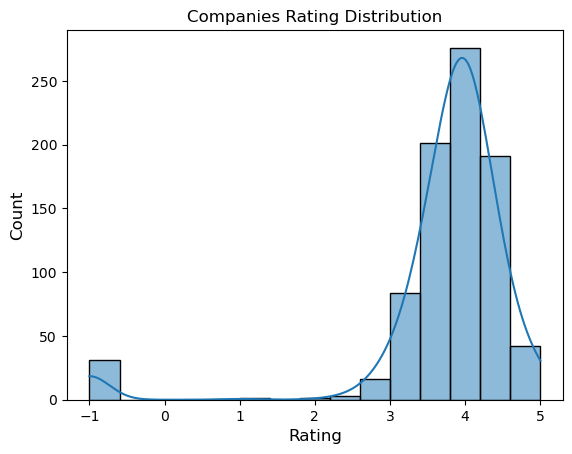

In [102]:
sns.histplot(data=df, x="Rating",bins=15,kde=True)
plt.xlabel("Rating",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Companies Rating Distribution",fontsize=12)
plt.savefig(os.path.join(PLOTPATH,"companies_rating_dist"))

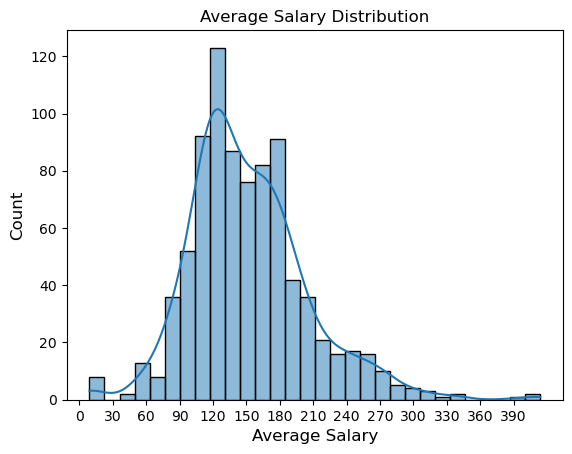

In [117]:
sns.histplot(data=df, x="average_salary",bins=30,kde=True)
plt.xlabel("Average Salary",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(range(0, int(max(df["average_salary"]))+1,30))  # Set ticks at intervals of 5 or adjust as needed
plt.title("Average Salary Distribution",fontsize=12)
plt.savefig(os.path.join(PLOTPATH,"average_salary_dist"))

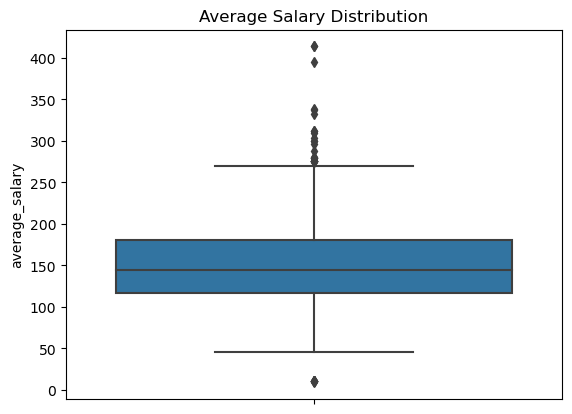

In [119]:
sns.boxplot(data=df,  y="average_salary")
plt.title("Average Salary Distribution",fontsize=12)
plt.savefig(os.path.join(PLOTPATH,"average_salary_boxplot"))

In [120]:
df["size"].unique()

array(['1 to 50 Employees', '10000+ Employees', '5001 to 10000 Employees',
       '501 to 1000 Employees', 'Unknown', '51 to 200 Employees', '-1',
       '1001 to 5000 Employees', '201 to 500 Employees'], dtype=object)

In [122]:
data = [go.Bar(
    y=df["size"],x=df.average_salary,orientation='h'
)]

layout = go.Layout(title="Bar plot for Company Size",xaxis=dict(title="Frequencey"),
    yaxis=dict(title='DevType'))
    
fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_html(os.path.join(PLOTPATH, 'company_size_barplot.html'))

In [ ]:
#average salary with company size 

In [ ]:
#company size with rating 

In [ ]:
#salary and location 

In [ ]:
#type', 'founded', 'industry','sector', 'company_revenue' and salary 

In [ ]:
#'benefits','culture_values', 'senior_management', 'work_life_balance' and slary 

In [ ]:
#'seniority' and salary 

In [123]:
grped=df.groupby("size")["average_salary"].mean().sort_values()
print(grped)

size
1 to 50 Employees          133.431818
51 to 200 Employees        141.058824
Unknown                    141.764706
201 to 500 Employees       142.684595
-1                         146.100000
501 to 1000 Employees      150.228070
1001 to 5000 Employees     153.146735
10000+ Employees           155.956111
5001 to 10000 Employees    158.529437
Name: average_salary, dtype: float64


In [125]:
data = [go.Bar(
    y=grped.index,x=grped.values,orientation='h'
)]

layout = go.Layout(title="Bar plot for average salary per company size ",xaxis=dict(title="Average Salary"),
    yaxis=dict(title='Company Siza'))
    
fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_html(os.path.join(PLOTPATH, 'salary_company_size_Barplot.html'))

In [128]:
Numerical_corr=df[["company_age","average_salary","Rating"]].corr()
Numerical_corr

,company_age,average_salary,Rating
company_age,1.000000,-0.040919,0.158582
average_salary,-0.040919,1.000000,0.079730
Rating,0.158582,0.079730,1.000000


In [180]:
fig = go.Figure(data=go.Heatmap(x=Numerical_corr.index,y=Numerical_corr.columns, z=Numerical_corr, colorscale='magma', ygap=1))
fig.update_layout(width=600, height=400)
fig.show()
fig.write_html(os.path.join(PLOTPATH, 'heatmap.html'))

In [129]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'size', 'type', 'founded', 'industry',
       'sector', 'company_revenue', 'career_opportunities', 'benefits',
       'culture_values', 'senior_management', 'work_life_balance', 'Hourly',
       'Employer_Provided', 'min_salary', 'max_salary', 'average_salary',
       'company_txt', 'job_state', 'company_age', 'python_req', 'excel_req',
       'spark_req', 'aws_req', 'sql_req', 'r_req', 'scala_req', 'julia_req',
       'java_req', 'java2_req', 'tensor_req', 'tensor2_req', 'seaborn_req',
       'pandas_req', 'jobtitle_simp', 'seniority', 'jobdesc_length'],
      dtype='object')

In [130]:
df_cat=df[["job_state","size","type",'industry','sector', 'company_revenue',"company_txt"]]

Graph for job_state: Total number is 48


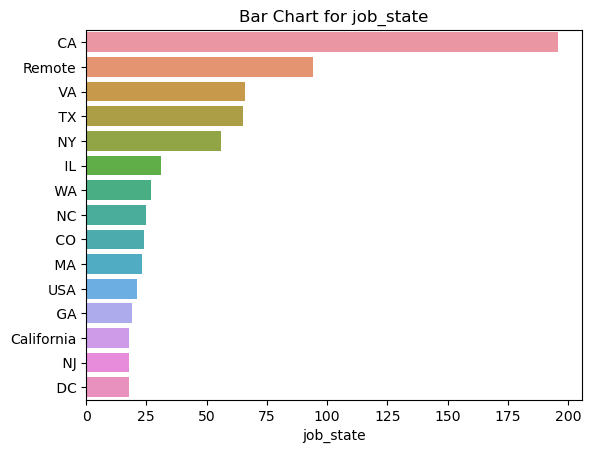

Graph for size: Total number is 8


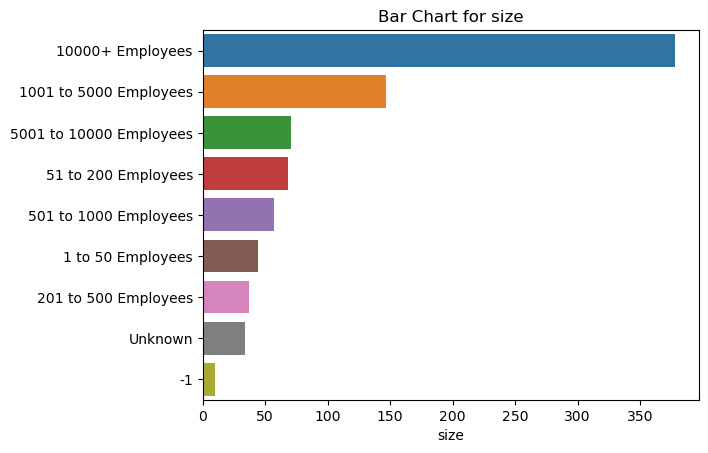

Graph for type: Total number is 11


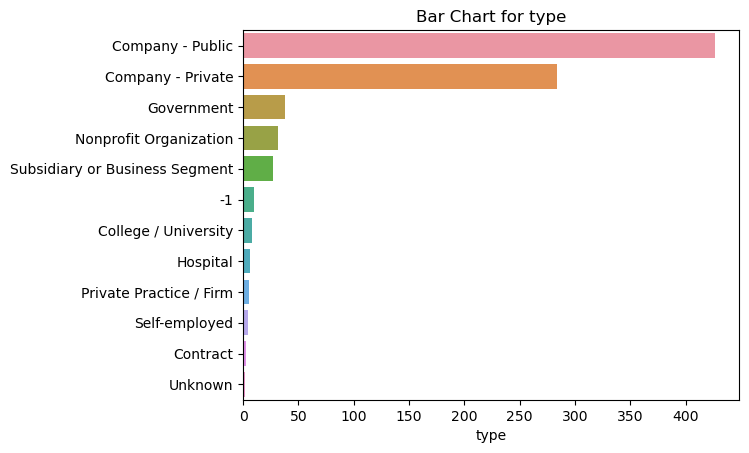

Graph for industry: Total number is 66


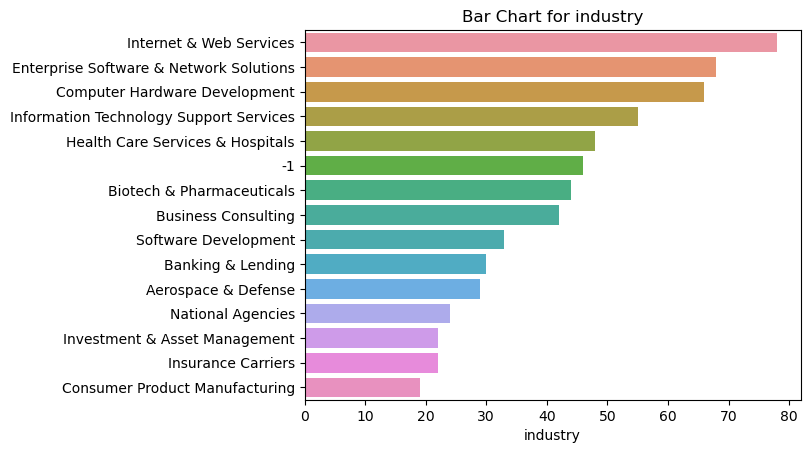

Graph for sector: Total number is 25


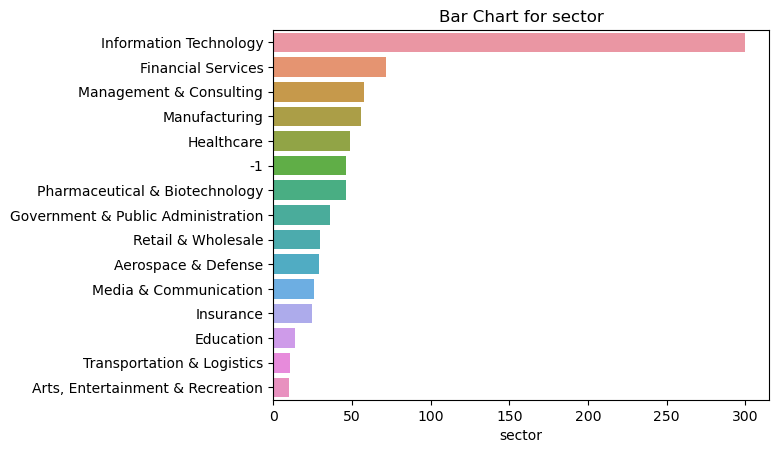

Graph for company_revenue: Total number is 10


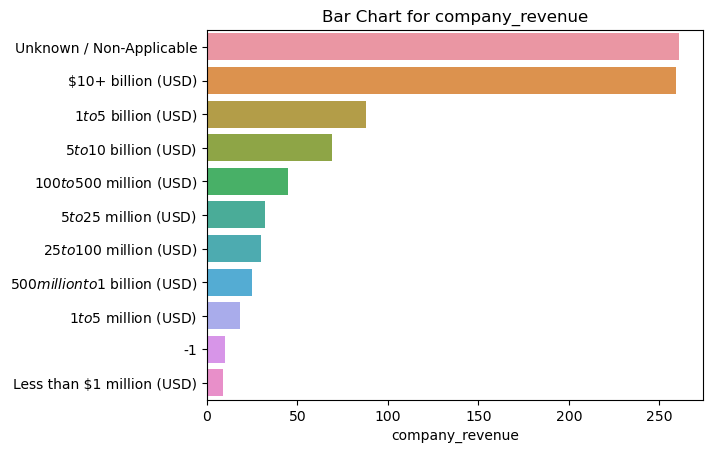

Graph for company_txt: Total number is 513


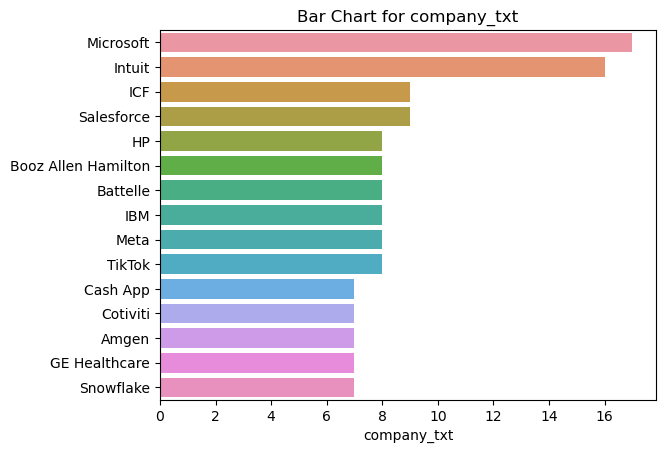

In [165]:
def cat_barplot(df, x, limit, title, figpath):
    column_values = df[x]
    count = column_values.nunique()
    to_graph = column_values.value_counts()[:limit]

    print("Graph for %s: Total number is %d" % (x, (count - 1) if "-1" in column_values.values else count))
    chart = sns.barplot(y=to_graph.index, x=to_graph)
    plt.title(title)
    plt.savefig(os.path.join(figpath, f"{title}.png"),bbox_inches='tight')
    plt.show()

# Assuming 'df_cat' is your DataFrame and 'PLOTPATH' is the path where you want to save the plots
for column_name in df_cat.columns:
    cat_barplot(df_cat, column_name, 15, f"Bar Chart for {column_name}", PLOTPATH)

In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'size', 'type', 'founded', 'industry',
       'sector', 'company_revenue', 'career_opportunities', 'benefits',
       'culture_values', 'senior_management', 'work_life_balance', 'Hourly',
       'Employer_Provided', 'min_salary', 'max_salary', 'average_salary',
       'company_txt', 'job_state', 'company_age', 'python_req', 'excel_req',
       'spark_req', 'aws_req', 'r_req', 'sql_req', 'scala_req', 'julia_req',
       'java_req', 'java2_req', 'tensor_req', 'seaborn_req', 'pandas_req',
       'tensor2_req', 'jobtitle_simp', 'seniority', 'jobdesc_length'],
      dtype='object')

In [166]:
#average salary with job title 

print(df.groupby("jobtitle_simp")["average_salary"].mean())

jobtitle_simp
data analyst      121.901961
data engineer     144.584615
data scientist    150.782470
director          243.000000
mle               177.452381
na                163.855422
Name: average_salary, dtype: float64


In [ ]:
#'seniority' and salary 
#average salary with company size 
#company size with rating 
#type', 'founded', 'industry','sector', 'company_revenue' and salary 
#'benefits','culture_values', 'senior_management', 'work_life_balance' and salary 
#location and Salary


In [167]:
#'seniority' and salary 

print(df.groupby(["jobtitle_simp","seniority"])["average_salary"].mean())

jobtitle_simp   seniority
data analyst    jr            92.000000
                na           107.533333
                senior       133.677419
data engineer   na           152.509091
                senior       101.000000
data scientist  jr           117.640488
                na           142.253021
                senior       177.382979
director        na           243.000000
mle             jr            85.000000
                na           172.612903
                senior       201.700000
na              jr            90.500000
                na           153.491228
                senior       194.583333
Name: average_salary, dtype: float64


In [168]:
#average salary with company size 
print(df.groupby("size")["average_salary"].mean())

size
-1                         146.100000
1 to 50 Employees          133.431818
10000+ Employees           155.956111
1001 to 5000 Employees     153.146735
201 to 500 Employees       142.684595
5001 to 10000 Employees    158.529437
501 to 1000 Employees      150.228070
51 to 200 Employees        141.058824
Unknown                    141.764706
Name: average_salary, dtype: float64


In [169]:
#company size with rating 

print(df.groupby("size")["Rating"].mean())

size
-1                        -1.000000
1 to 50 Employees          3.002273
10000+ Employees           3.916667
1001 to 5000 Employees     3.910884
201 to 500 Employees       3.597297
5001 to 10000 Employees    3.802817
501 to 1000 Employees      3.700000
51 to 200 Employees        4.160294
Unknown                    2.752941
Name: Rating, dtype: float64


In [171]:
df['company_score'] = df[['career_opportunities', 'benefits', 'culture_values', 'senior_management', 'work_life_balance']].sum(axis=1) / 5

In [172]:
df["company_rate"] = ["high" if row["company_score"] >= 3.5 else "medium" if 2.5 <= row["company_score"] < 3.5 
                      else "low" for index, row in df.iterrows()]
df["company_rate"].value_counts()

high      623
medium    186
low        37
Name: company_rate, dtype: int64

In [173]:
#'benefits','culture_values', 'senior_management', 'work_life_balance' and salary 

print(df.groupby("company_rate")["average_salary"].mean())

company_rate
high      154.860353
low       136.054054
medium    144.053226
Name: average_salary, dtype: float64


In [174]:
#type', 'founded', 'industry','sector', 'company_revenue' and salary 
company_attributes=["type",'company_age', 'industry','sector', 'company_revenue']

for i in company_attributes:

    print(" {} vs Average Salary".format(i))
    print("")
    print(df.groupby([i])["average_salary"].mean().sort_values(ascending=False))

    print("----------")
    print("")

 type vs Average Salary

type
Company - Public                  162.297073
Private Practice / Firm           151.600000
Subsidiary or Business Segment    146.851852
-1                                146.100000
Company - Private                 145.730035
Contract                          141.000000
Unknown                           139.000000
Hospital                          134.191667
Self-employed                     128.500000
Nonprofit Organization            123.218750
Government                        121.120263
College / University              108.500000
Name: average_salary, dtype: float64
----------

 company_age vs Average Salary

company_age
231    338.000000
111    263.000000
176    262.000000
170    254.000000
147    254.000000
          ...    
182     85.000000
93      83.000000
23      79.388889
148     69.000000
97      58.000000
Name: average_salary, Length: 145, dtype: float64
----------

 industry vs Average Salary

industry
Electronics Manufacturing     217.66666

In [175]:
#location and Salary
print(df.groupby("job_state")["average_salary"].mean().sort_values(ascending=False))

job_state
Alabama           205.000000
 CA               187.321429
USA               186.380952
 WA               184.493704
New York State    178.000000
 CT               174.666667
 RI               170.000000
 NY               167.053571
 MN               164.333333
 HI               161.666667
Remote            159.329787
 MA               150.913043
 FL               147.400000
 NJ               147.222222
 IA               142.523333
 IL               140.225806
 AZ               136.800000
California        136.555556
 OR               136.000000
 MD               136.000000
 MO               133.700000
 GA               133.526316
 VA               132.515152
 UT               130.750000
 DC               129.500000
 KY               125.000000
 OH               123.714286
 TX               121.553846
 CO               120.416667
 PA               119.200000
 AL               119.000000
 MI               118.625000
 DE               118.000000
 NC               117.600000
 NE 

In [176]:
req_attributes=['python_req', 'excel_req',
       'spark_req', 'aws_req', 'r_req', 'sql_req', 'scala_req', 'julia_req',
       'java_req', 'java2_req', 'tensor_req', 'seaborn_req', 'pandas_req',
       'tensor2_req']

In [177]:
#'python_req', 'excel_req','spark_req', 'aws_req', 'r_req', 'sql_req', 'scala_req', 'juliareq',
  #'java_req', 'java2_req', 'tensor_req', 'seaborn_req', 'pandas_req','tensor2_req' and salary 
    
req_attributes=['python_req', 'excel_req',
       'spark_req', 'aws_req', 'r_req', 'sql_req', 'scala_req', 'julia_req',
       'java_req', 'java2_req', 'tensor_req', 'seaborn_req', 'pandas_req',
       'tensor2_req']

for i in req_attributes:

    print(" {} vs Average Salary".format(i))
    print("")
    print(df.groupby([i])["average_salary"].mean().sort_values(ascending=False))

    print("----------")
    print("")

 python_req vs Average Salary

python_req
1    154.106098
0    143.501692
Name: average_salary, dtype: float64
----------

 excel_req vs Average Salary

excel_req
0    158.907609
1    143.026943
Name: average_salary, dtype: float64
----------

 spark_req vs Average Salary

spark_req
1    155.214724
0    150.813909
Name: average_salary, dtype: float64
----------

 aws_req vs Average Salary

aws_req
1    154.055543
0    150.611514
Name: average_salary, dtype: float64
----------

 r_req vs Average Salary

r_req
0    151.669704
1    145.000000
Name: average_salary, dtype: float64
----------

 sql_req vs Average Salary

sql_req
1    151.818208
0    151.456721
Name: average_salary, dtype: float64
----------

 scala_req vs Average Salary

scala_req
1    165.403974
0    148.676115
Name: average_salary, dtype: float64
----------

 julia_req vs Average Salary

julia_req
0    151.69064
1    139.50000
Name: average_salary, dtype: float64
----------

 java_req vs Average Salary

java_req
0    153.1

[nltk_data] Downloading package punkt to C:\Users\Mohamed
[nltk_data]     Arafa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohamed
[nltk_data]     Arafa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


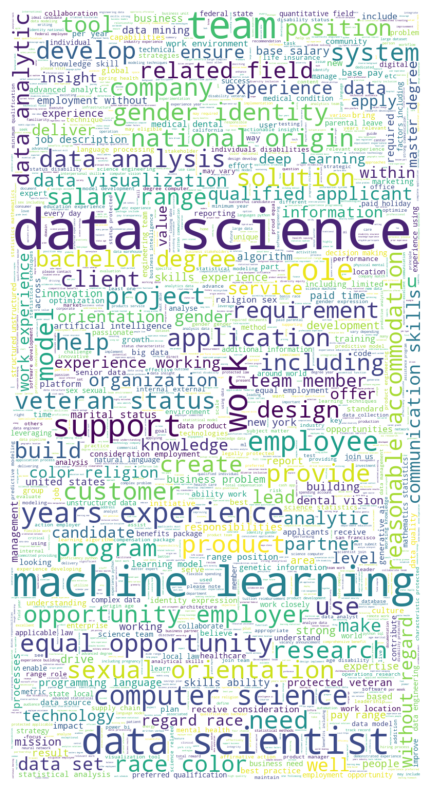

In [178]:

nltk.download('punkt')
nltk.download('stopwords')

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [179]:
df.to_csv(os.path.join(PROCESSEDPATH,'EDA_glassdoor_jobs.csv'), index = False)